In [2]:
from modules.loader import load_video_as_ndarray, print_video_frames
import pathlib
import time

sample = pathlib.Path("./data/001697.mp4")
#sample = pathlib.Path("./data/unsorted/14/segments/000125.mp4")

Generate: 0.002999544143676758 | Cache: 0.002001047134399414 (-33.28829186869088%)


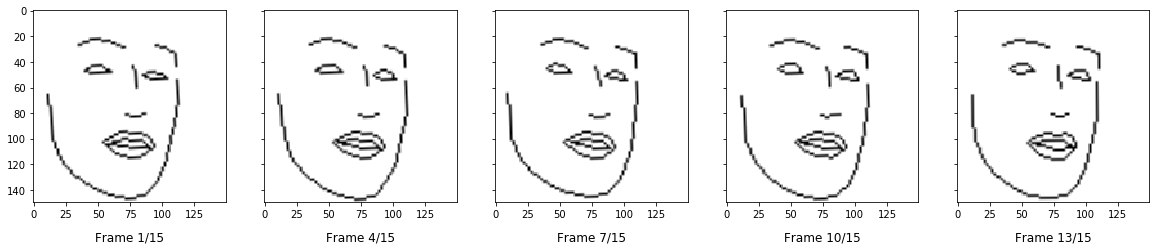

In [5]:
## RGB Mode
time0 = time.time()
video_rgb = load_video_as_ndarray(sample, 'landmarks', mirror=False, enable_cache=True)
time1 = time.time()
video_rgb = load_video_as_ndarray(sample, 'landmarks', mirror=True, enable_cache=True)
time2 = time.time()

print_video_frames(video_rgb, 3)
gen_time = time1 - time0
cache_time = time2 - time1
print("Generate: {} | Cache: {} (-{}%)".format(gen_time, cache_time, 100 - (cache_time / gen_time) * 100))

In [ ]:
# Grayscale Mode
video_gray = load_video_as_ndarray(sample, 'gray', enable_cache=False)
print_video_frames(video_gray, 3)

In [ ]:
# Landmarks
video_lm = load_video_as_ndarray(sample, 'landmarks', enable_cache=False)

print_video_frames(video_lm, 3)

In [ ]:
import cv2 as cv2
import pandas as pd
from math import floor

base = cv2.imread('export/Tom_Cruise_avp_2014_4.jpg')
points = pd.read_csv('export/dump.txt', header=None)

for index, row in enumerate(points.itertuples()):
    img = base.copy()
    for pt in range(1, len(points.columns), 2):
        x = row[pt]
        y = row[pt+1]
        print((x, y))
        img = cv2.circle(img, (floor(x/2), floor(y/2)), 4, (0, 0, 255), 5)
        cv2.imwrite('figures/faciallm_iter{}.jpg'.format(index), img)